# Data Preparation and Cleaning

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


# Load the CSV file into a DataFrame
data = pd.read_csv("Merged_ServiceTime.csv")
data

,Unnamed: 0,ID,Session,Month,DayOfWeek,WorkingDay,AM_PM,Visit.No,Gender,M.Cancer,S.Cancer,StartTime,PayTime,Address,ServTime
0,0,HAA052B7CD,1,January,Wednesday,True,morning,7.0,F,True,False,08:31:40,8:44:28,Out of city,691.0
1,1,HA18BDDC46,1,January,Wednesday,True,morning,6.0,F,False,False,08:43:11,9:07:31,In the city,614.0
2,2,HFC7DD5A0B,1,January,Wednesday,True,morning,2.0,F,False,False,08:53:25,9:08:38,NaN,559.0
3,3,HE10BEEB38,1,January,Wednesday,True,morning,2.0,M,False,False,09:02:44,9:15:13,Out of city,749.0
4,4,HBF11B62B6,1,January,Wednesday,True,morning,10.0,F,False,False,09:26:19,10:01:57,Out of city,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,6848,H3DFAAC37D,381,December,Saturday,False,afternoon,10.0,F,False,False,18:03:18,18:08:28,In the city,206.0
6849,6849,H01819C68A,381,December,Saturday,False,afternoon,2.0,M,False,False,18:06:44,18:18:08,Out of province,684.0
6850,6850,H0ABD32EBA,381,December,Saturday,False,afternoon,1.0,M,False,False,18:27:53,18:53:31,In the city,1191.0
6851,6851,HFD3A7A3A4,381,December,Saturday,False,afternoon,36.0,F,False,False,18:47:44,19:07:35,In the city,459.0


In [80]:
# Convert 'StartTime' and 'PayTime' from string to datetime
# Then perform your operations:
data['StartTime'] = pd.to_datetime(data['StartTime'], format='%H:%M:%S')
data['PayTime'] = pd.to_datetime(data['PayTime'], format='%H:%M:%S')
data['ServiceDuration'] = (data['PayTime'] - data['StartTime']).dt.total_seconds() / 60

# Check for any missing values and fill or drop them
data = data.dropna()  # Assuming we drop rows with missing values for simplicity
data

,Unnamed: 0,ID,Session,Month,DayOfWeek,WorkingDay,AM_PM,Visit.No,Gender,M.Cancer,S.Cancer,StartTime,PayTime,Address,ServTime,ServiceDuration
0,0,HAA052B7CD,1,January,Wednesday,True,morning,7.0,F,True,False,1900-01-01 08:31:40,1900-01-01 08:44:28,Out of city,691.0,12.800000
1,1,HA18BDDC46,1,January,Wednesday,True,morning,6.0,F,False,False,1900-01-01 08:43:11,1900-01-01 09:07:31,In the city,614.0,24.333333
3,3,HE10BEEB38,1,January,Wednesday,True,morning,2.0,M,False,False,1900-01-01 09:02:44,1900-01-01 09:15:13,Out of city,749.0,12.483333
4,4,HBF11B62B6,1,January,Wednesday,True,morning,10.0,F,False,False,1900-01-01 09:26:19,1900-01-01 10:01:57,Out of city,450.0,35.633333
5,5,H70AA1DE11,1,January,Wednesday,True,morning,14.0,M,False,False,1900-01-01 09:33:49,1900-01-01 10:03:01,Out of city,744.0,29.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,6848,H3DFAAC37D,381,December,Saturday,False,afternoon,10.0,F,False,False,1900-01-01 18:03:18,1900-01-01 18:08:28,In the city,206.0,5.166667
6849,6849,H01819C68A,381,December,Saturday,False,afternoon,2.0,M,False,False,1900-01-01 18:06:44,1900-01-01 18:18:08,Out of province,684.0,11.400000
6850,6850,H0ABD32EBA,381,December,Saturday,False,afternoon,1.0,M,False,False,1900-01-01 18:27:53,1900-01-01 18:53:31,In the city,1191.0,25.633333
6851,6851,HFD3A7A3A4,381,December,Saturday,False,afternoon,36.0,F,False,False,1900-01-01 18:47:44,1900-01-01 19:07:35,In the city,459.0,19.850000


# Exploratory Data Analysis (EDA)

count    4239.000000
mean       26.590383
std        34.247343
min         0.166667
25%        14.250000
50%        19.000000
75%        26.208333
max       505.266667
Name: ServiceDuration, dtype: float64


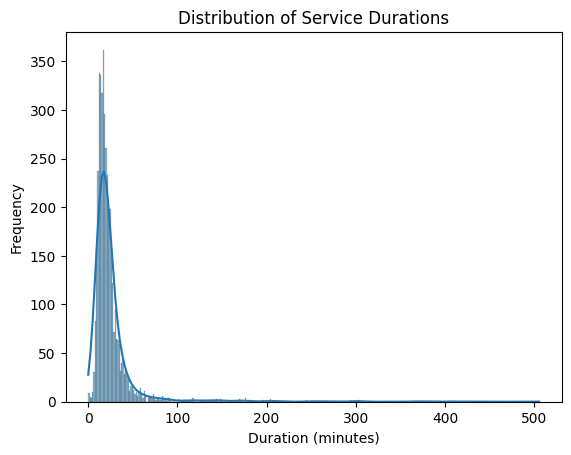

In [81]:
# Basic statistics
print(data['ServiceDuration'].describe())

# Distribution of service time
sns.histplot(data['ServiceDuration'], kde=True)
plt.title('Distribution of Service Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()



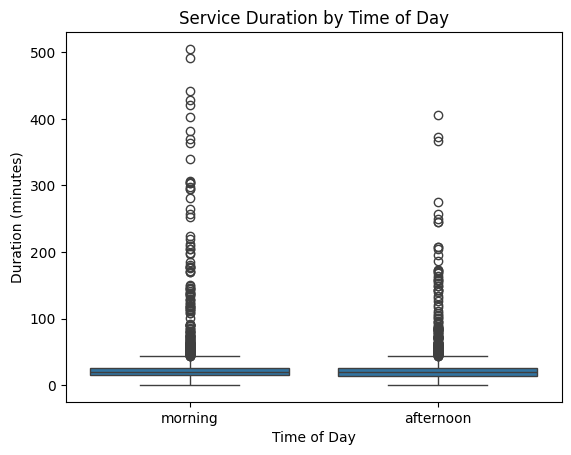

In [82]:
# Boxplot to visualize service time by AM/PM
sns.boxplot(x='AM_PM', y='ServiceDuration', data=data)
plt.title('Service Duration by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Duration (minutes)')
plt.show()



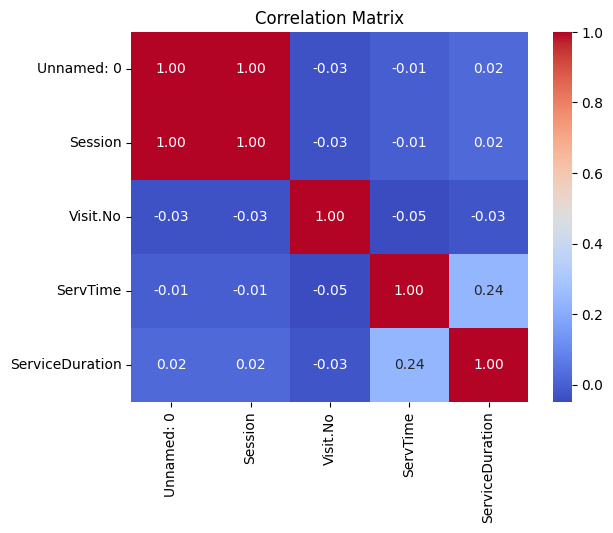

In [83]:
# Correlation matrix
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

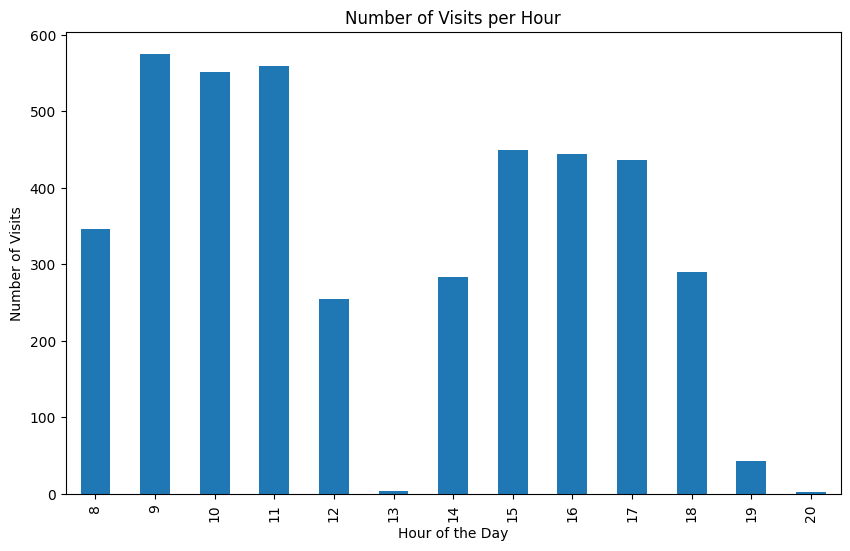

In [84]:
# Analyze the distribution of visits throughout the day
plt.figure(figsize=(10, 6))
df['Hour'] = pd.to_datetime(df['StartTime']).dt.hour
visit_counts = df.groupby('Hour').size()
visit_counts.plot(kind='bar')
plt.title('Number of Visits per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Visits')
plt.show()

        Unnamed: 0      Session     Visit.No                      StartTime  \
count  4239.000000  4239.000000  4239.000000                           4239   
mean   3532.846662   199.684831     8.577967  1900-01-01 13:15:37.344185088   
min       0.000000     1.000000     1.000000            1900-01-01 08:14:33   
25%    1843.500000   104.000000     1.000000            1900-01-01 10:15:11   
50%    3566.000000   203.000000     3.000000            1900-01-01 12:09:23   
75%    5268.500000   298.000000     8.000000     1900-01-01 16:22:48.500000   
max    6852.000000   381.000000   170.000000            1900-01-01 20:31:01   
std    1985.941816   111.477313    18.299111                            NaN   

                             PayTime      ServTime  ServiceDuration  
count                           4239   4239.000000      4239.000000  
mean   1900-01-01 13:42:12.767162112    793.836282        26.590383  
min              1900-01-01 08:35:45      0.000000         0.166667  
25%     

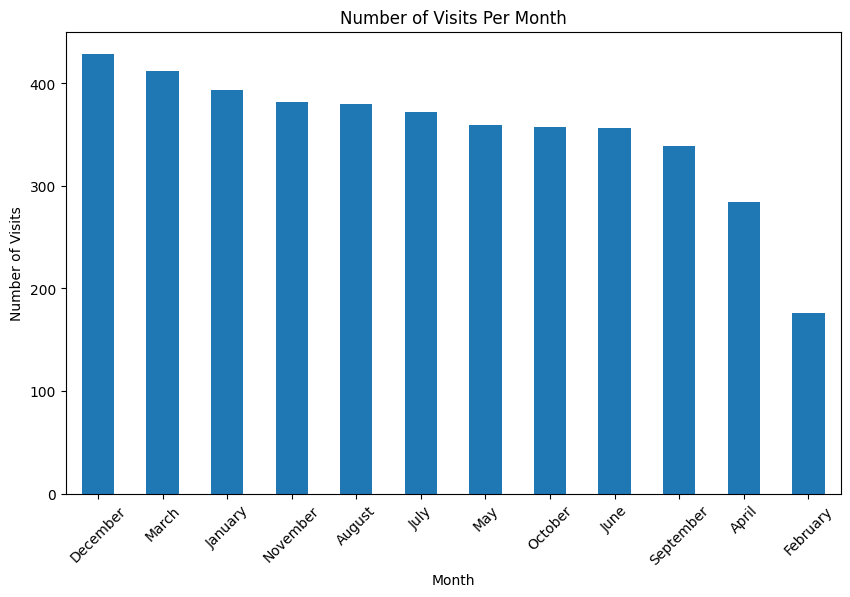

In [86]:
# Exploratory Data Analysis
# Descriptive statistics
print(data.describe())

# Count of visits per month
visits_per_month = data['Month'].value_counts()
print(visits_per_month)

# Data Visualization
# Plotting distributions of visits over months
plt.figure(figsize=(10, 6))
visits_per_month.plot(kind='bar')
plt.title('Number of Visits Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()


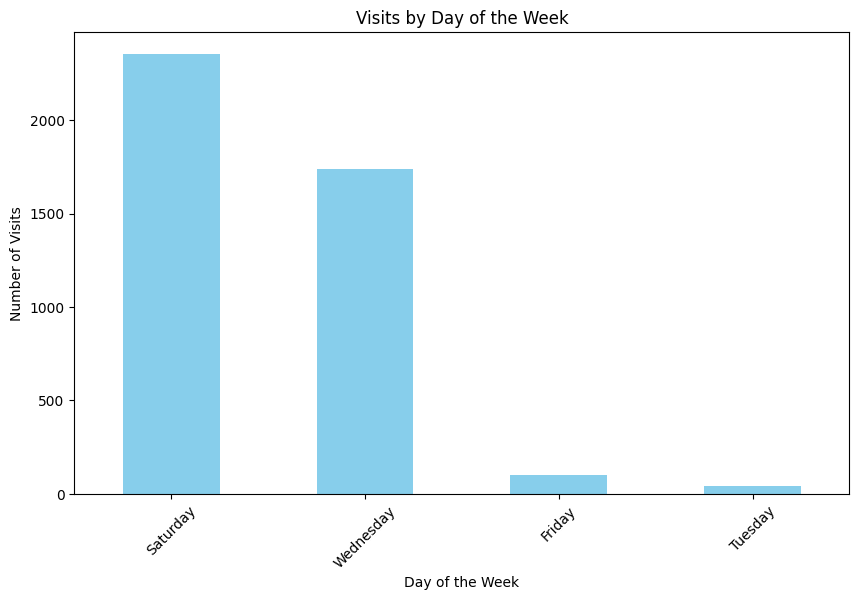

In [87]:

# Frequency of visits by day of the week
visits_by_day = data['DayOfWeek'].value_counts()
plt.figure(figsize=(10, 6))
visits_by_day.plot(kind='bar', color='skyblue')
plt.title('Visits by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()




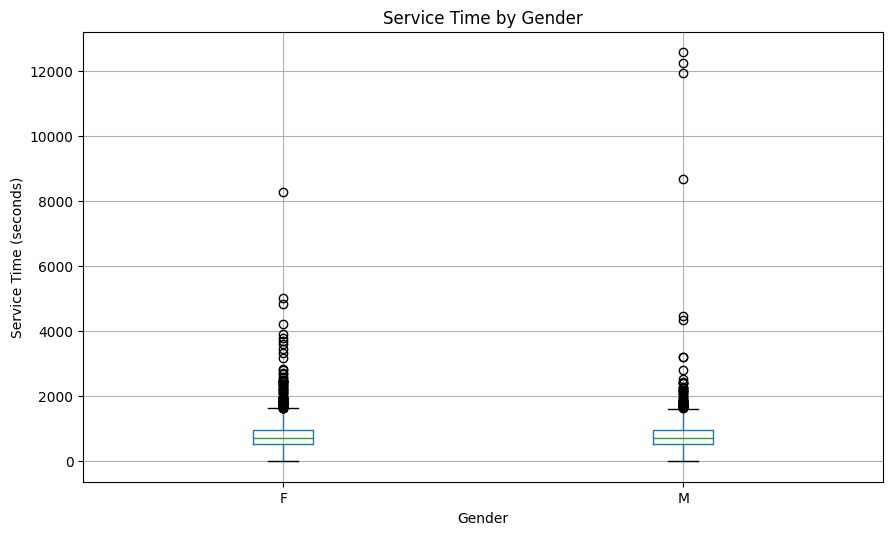

T-test results -- T-statistic: 4.812084412848904, P-value: 1.5474581545450992e-06
Significant difference in service times between working and non-working days.


In [88]:


# Analysis of service time by gender
boxplot = data.boxplot(column=['ServTime'], by='Gender', figsize=(10, 6))
plt.title('Service Time by Gender')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Gender')
plt.ylabel('Service Time (seconds)')
plt.show()

# Statistical Analysis / Hypothesis Testing
# Example: Compare mean service time on working days vs. non-working days
working_days = data[data['WorkingDay'] == True]['ServTime']
non_working_days = data[data['WorkingDay'] == False]['ServTime']

from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(working_days.dropna(), non_working_days.dropna(), equal_var=False)
print(f"T-test results -- T-statistic: {t_stat}, P-value: {p_val}")

# Check if the difference is significant
if p_val < 0.05:
    print("Significant difference in service times between working and non-working days.")
else:
    print("No significant difference in service times between working and non-working days.")

In [89]:
# Convert 'StartTime' and 'PayTime' to datetime
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['PayTime'] = pd.to_datetime(data['PayTime'])

# Calculate actual service time in minutes
data['ServTimeMinutes'] = (data['PayTime'] - data['StartTime']).dt.total_seconds() / 60

# Fill or drop missing values
data.dropna(subset=['ServTimeMinutes'], inplace=True)

/var/folders/tf/6tszc4p95dn6fjrhhsz6w6380000gn/T/ipykernel_4486/3013615063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['StartTime'] = pd.to_datetime(data['StartTime'])
/var/folders/tf/6tszc4p95dn6fjrhhsz6w6380000gn/T/ipykernel_4486/3013615063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PayTime'] = pd.to_datetime(data['PayTime'])
/var/folders/tf/6tszc4p95dn6fjrhhsz6w6380000gn/T/ipykernel_4486/3013615063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [90]:
# Convert categorical data to numeric using one-hot encoding
df = pd.get_dummies(data, columns=['Month', 'DayOfWeek', 'AM_PM', 'Gender'], drop_first=True)

# Add a feature for the time of day in hours
df['HourOfDay'] = df['StartTime'].dt.hour

In [91]:
#set parameters 
DPI = 85
FONTSIZE1 = 15
FONTSIZE2 = 13

PROPS = {
    'flierprops':{'marker':'o','markerfacecolor':'black','markeredgecolor':'black'},
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops' : {'color':'black'},
    'meanprops' :{'marker':'D','markerfacecolor':'black','markeredgecolor':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
COLOR1 = [149/255,150/255,201/255]
COLOR2 = [111/255,186/255,198/255]
COLOR3 = [211/255,144/255,162/255]
COLOR4 = [241/255,173/255,111/255]

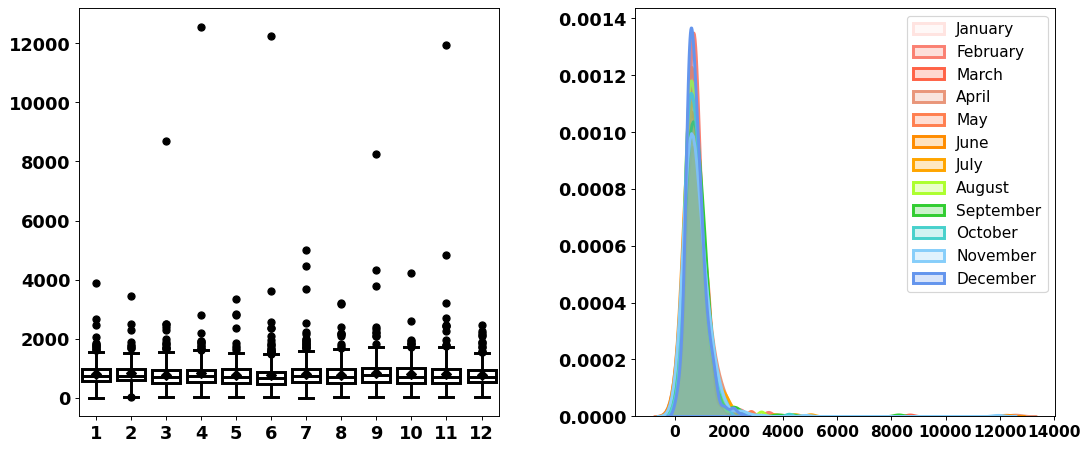

In [92]:
fig = plt.figure(figsize = (14,6.5),dpi = DPI)


plt.subplot(121)
sns.boxplot(x = 'Month',y = data['ServTime'],data = data,notch = False,showmeans=True,
            linewidth=2.5,color = 'white',**PROPS)
plt.tick_params(axis='both')
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(12), range(1,13))
plt.yticks(fontweight='bold',fontsize = FONTSIZE1)
plt.xticks(fontweight='bold',fontsize = FONTSIZE1)

plt.subplot(122)
colors = ['mistyrose','salmon','tomato','darksalmon','coral','darkorange','orange','greenyellow','limegreen','mediumturquoise','lightskyblue','cornflowerblue']
for i,j in zip(data['Month'].unique(),colors):
    sns.kdeplot(data[data['Month']==i]['ServTime'],fill=True,label = i,linewidth=2.5,color =j)
plt.legend(loc='best',fontsize = FONTSIZE2)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontweight='bold',fontsize = FONTSIZE1)
plt.xticks(fontweight='bold',fontsize = FONTSIZE2)
fig.tight_layout()
fig.tight_layout(pad=5.0)

# Feature Importance Analysis

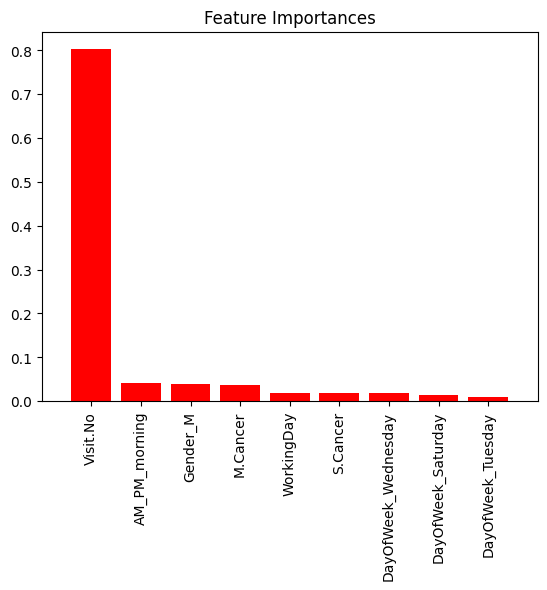

In [108]:
# Analyze feature importance from the Random Forest model
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Model Building

## Feature Engineering and Model Enhancement and Model Evaluation with Cross-Validation

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Preparing data for modeling
X = pd.get_dummies(data[['DayOfWeek', 'WorkingDay', 'AM_PM', 'Gender', 'M.Cancer', 'S.Cancer', 'Visit.No']], drop_first=True)
y = data['ServiceDuration']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting service times
predictions = model.predict(X_test)

# Calculate and print the model's performance
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Evaluate the original Random Forest model with cross-validation
scores_rf = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest CV MSE: {-scores_rf.mean()}")

# Evaluate the enhanced Gradient Boosting model with cross-validation
scores_gb = cross_val_score(GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42), X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Gradient Boosting CV MSE: {-scores_gb.mean()}")

Mean Squared Error: 1134.904231830984
Random Forest CV MSE: 1266.6919341222813
Gradient Boosting CV MSE: 1212.4904841818957


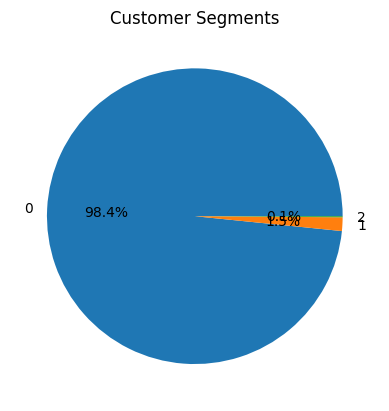

Segment
0      783.064493
1      717.904762
2    10736.400000
Name: ServTime, dtype: float64


In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['Visit.No', 'ServTime']].fillna(0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Use K-means clustering for segmentation
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(features_scaled)

# Analyze the segments
segmentation_counts = df['Segment'].value_counts()
segmentation_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segments')
plt.ylabel('')
plt.show()

# Explore average service time by segment
average_serv_time_by_segment = df.groupby('Segment')['ServTime'].mean()
print(average_serv_time_by_segment)